In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import datasets

import numpy as np

Load the dataset mnist from keras datasets library

In [2]:
data = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = data.load_data()

Visualise the data

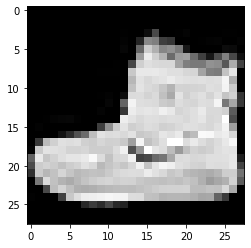

In [3]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

Normalize the data 

In [4]:
x_train= x_train/255.0
x_test= x_test/255.0

Create the encoder:

In [5]:
encoder_input = keras.Input(shape=(28,28,1), name='original')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation='relu')(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

Create the decoder:

In [11]:
decoder_input = keras.layers.Dense(64, activation='sigmoid')(encoder_output)
x = keras.layers.Dense(784, activation='sigmoid')(decoder_input)
decoder_output = keras.layers.Reshape((28, 28, 1))(x)

decoder = keras.Model(decoder_input, decoder_output, name='decoder')

Create the autoencoder:

In [12]:
autoencoder = keras.Model(encoder_input, decoder_output, name = 'autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 original (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 784)               50960     
                                                                 
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 105,360
Trainable params: 105,360
Non-tra

In [13]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss ='mse'
batch_size = 32
epochs = 25

autoencoder.compile(optimizer, loss)
autoencoder.fit(x_train, x_train, epochs = epochs, batch_size= batch_size)

Epoch 1/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0377
Epoch 2/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0211
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0174
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0151
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0137
Epoch 6/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0128
Epoch 7/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0122
Epoch 8/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0118
Epoch 9/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0115
Epoch 10/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0112
Epoch 11/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0110
Epoch 12/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0109
E

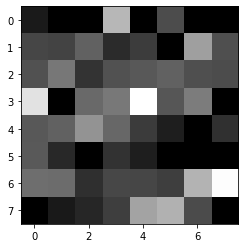

In [14]:
example = encoder.predict([x_test[0].reshape(-1,28,28,1)])[0]
plt.imshow(example.reshape((8,8)), cmap='gray')
plt.show()

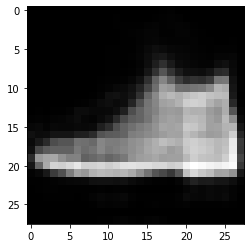

In [15]:
a = autoencoder.predict([x_test[0].reshape(-1,28,28,1)])[0]
plt.imshow(a, cmap='gray')
plt.show()